In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [54]:
def load_data():
    csv_data = pd.read_csv(os.path.join('data', 'real_data.csv'))
    return csv_data

data = load_data()
data.head()

area  bedrooms   location      furnished   price
0  1000.0         2  15.654482  Semifurnished   23000
1  1605.0         3  14.557471  Semifurnished   26000
2  1600.0         2   4.667385  Semifurnished   60000
3  1710.0         3  12.097065  Semifurnished   33000
4  6000.0         4  33.269811      Furnished  150000

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 0 to 1737
Data columns (total 5 columns):
area         1738 non-null float64
bedrooms     1738 non-null int64
location     1738 non-null float64
furnished    1738 non-null object
price        1738 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 81.5+ KB


In [56]:
data.describe() 

area     bedrooms     location         price
count   1738.000000  1738.000000  1738.000000  1.738000e+03
mean    1444.802670     2.111623    17.379743  3.523644e+04
std     1936.366252     0.970594    22.709565  7.873829e+04
min        1.000000     0.000000     1.679260  3.000000e+03
25%      748.500000     1.000000     7.535598  1.650000e+04
50%     1220.000000     2.000000    10.422353  2.300000e+04
75%     1666.000000     3.000000    14.892258  3.200000e+04
max    65340.000000     9.000000   146.174472  1.500000e+06

## Understandinng data

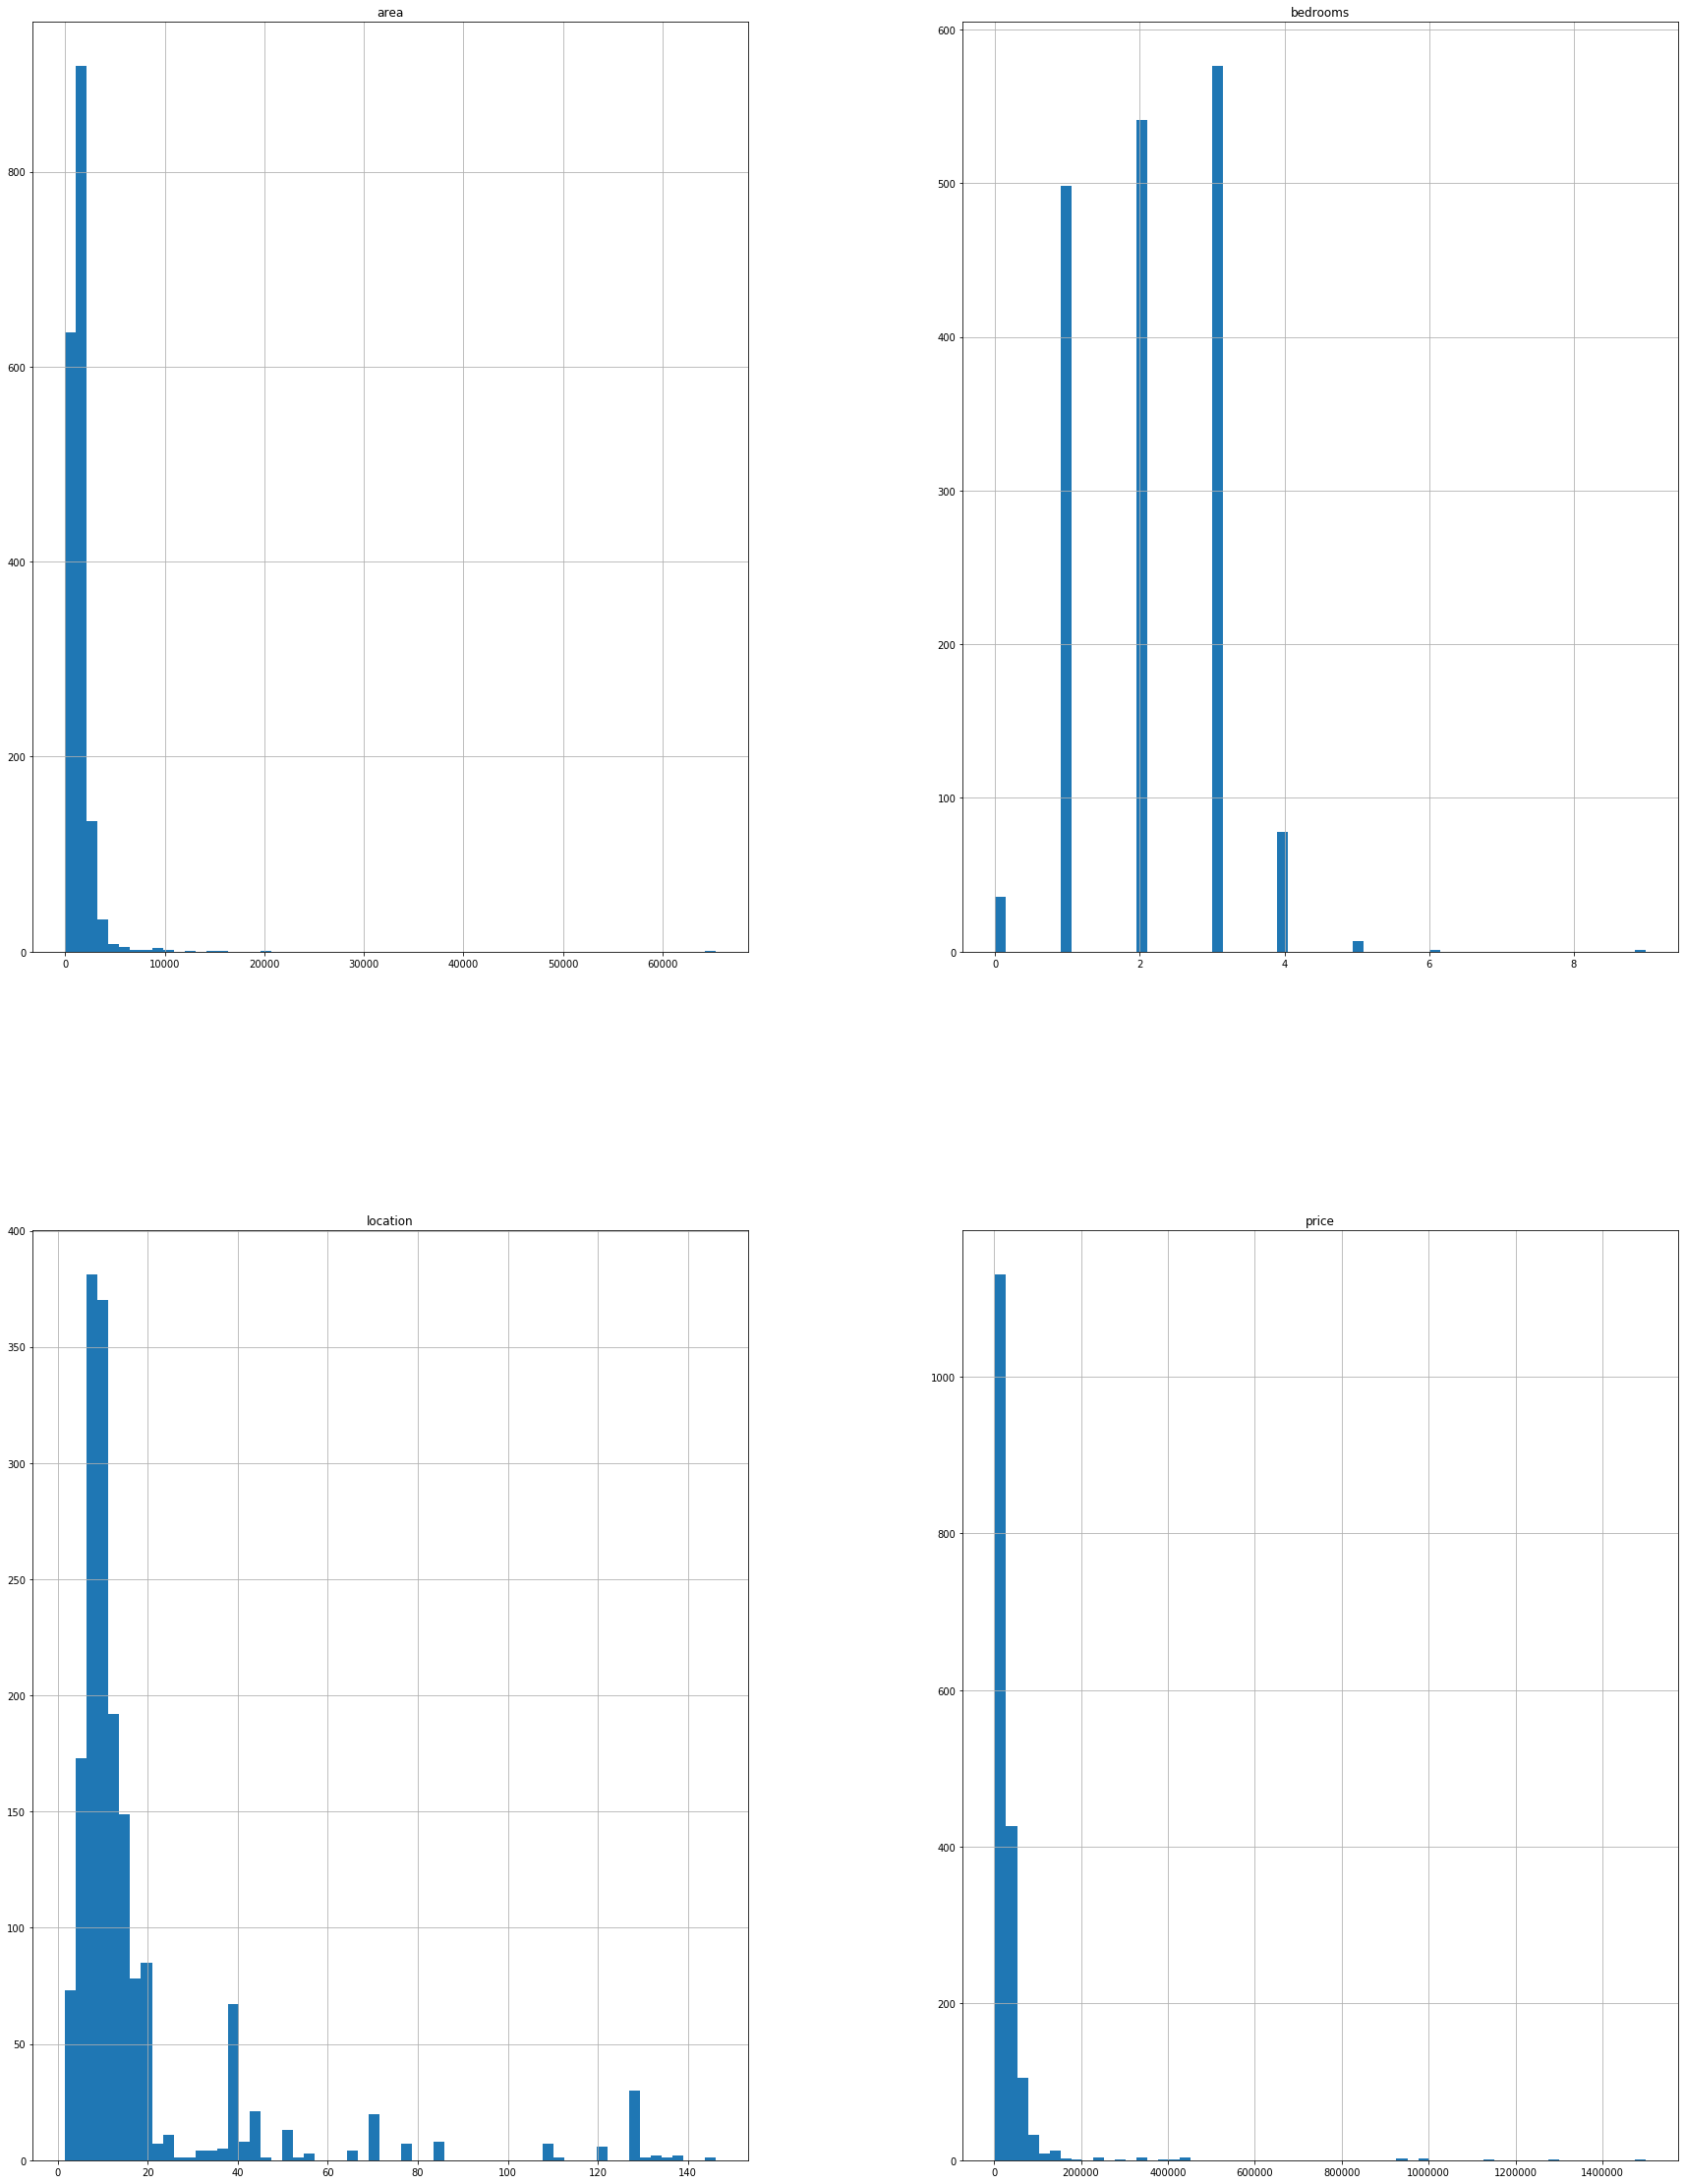

In [57]:
%matplotlib inline
data.hist(bins=60, figsize=(30, 40))
plt.show()

## Handling categorical data

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

furnished = data[['furnished']].copy()
encoder = OrdinalEncoder()
f_encoded = encoder.fit_transform(furnished)
furnished_tr = pd.DataFrame(f_encoded, columns = furnished.columns, index=furnished.index)

In [59]:
data[['furnished']] = furnished_tr
data

area  bedrooms   location  furnished   price
0     1000.0         2  15.654482        1.0   23000
1     1605.0         3  14.557471        1.0   26000
2     1600.0         2   4.667385        1.0   60000
3     1710.0         3  12.097065        1.0   33000
4     6000.0         4  33.269811        0.0  150000
...      ...       ...        ...        ...     ...
1733  7460.0         4  10.476684        1.0  450000
1734   550.0         1  10.422353        1.0   14000
1735  1917.0         3  10.675603        1.0   28000
1736  1595.0         3  10.675603        0.0   35000
1737   786.0         2  19.090645        1.0   16000

[1738 rows x 5 columns]

## Stratified Sampling and test train split

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=59)
for train_i, test_i in shuffle_splitter.split(data, data['furnished']):
    train_set = data.loc[train_i]
    test_set  = data.loc[test_i]

In [61]:
train_set['furnished'].value_counts()/len(train_set['furnished'])

1.0    0.871711
0.0    0.128289
Name: furnished, dtype: float64

In [62]:
test_set['furnished'].value_counts()/len(test_set['furnished']) 

1.0    0.871648
0.0    0.128352
Name: furnished, dtype: float64

In [63]:
housing_data = train_set.copy()
housing_data.head()

area  bedrooms   location  furnished  price
161   1410.0         3  16.394655        1.0  35000
289    250.0         1   6.170394        1.0  13000
217    750.0         1  10.422353        1.0  14000
1389   600.0         1   6.170394        1.0  19000
315   1500.0         3  43.313063        1.0  27000

## Correlation

In [64]:
housing_data["bedrooms_per_area"] = housing_data["bedrooms"]/housing_data["area"]
corr_matrix = housing_data.corr()
corr_matrix['price']

area                 0.384616
bedrooms             0.284140
location            -0.034099
furnished           -0.064061
price                1.000000
bedrooms_per_area    0.019419
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c10a320>,
      dtype=object)

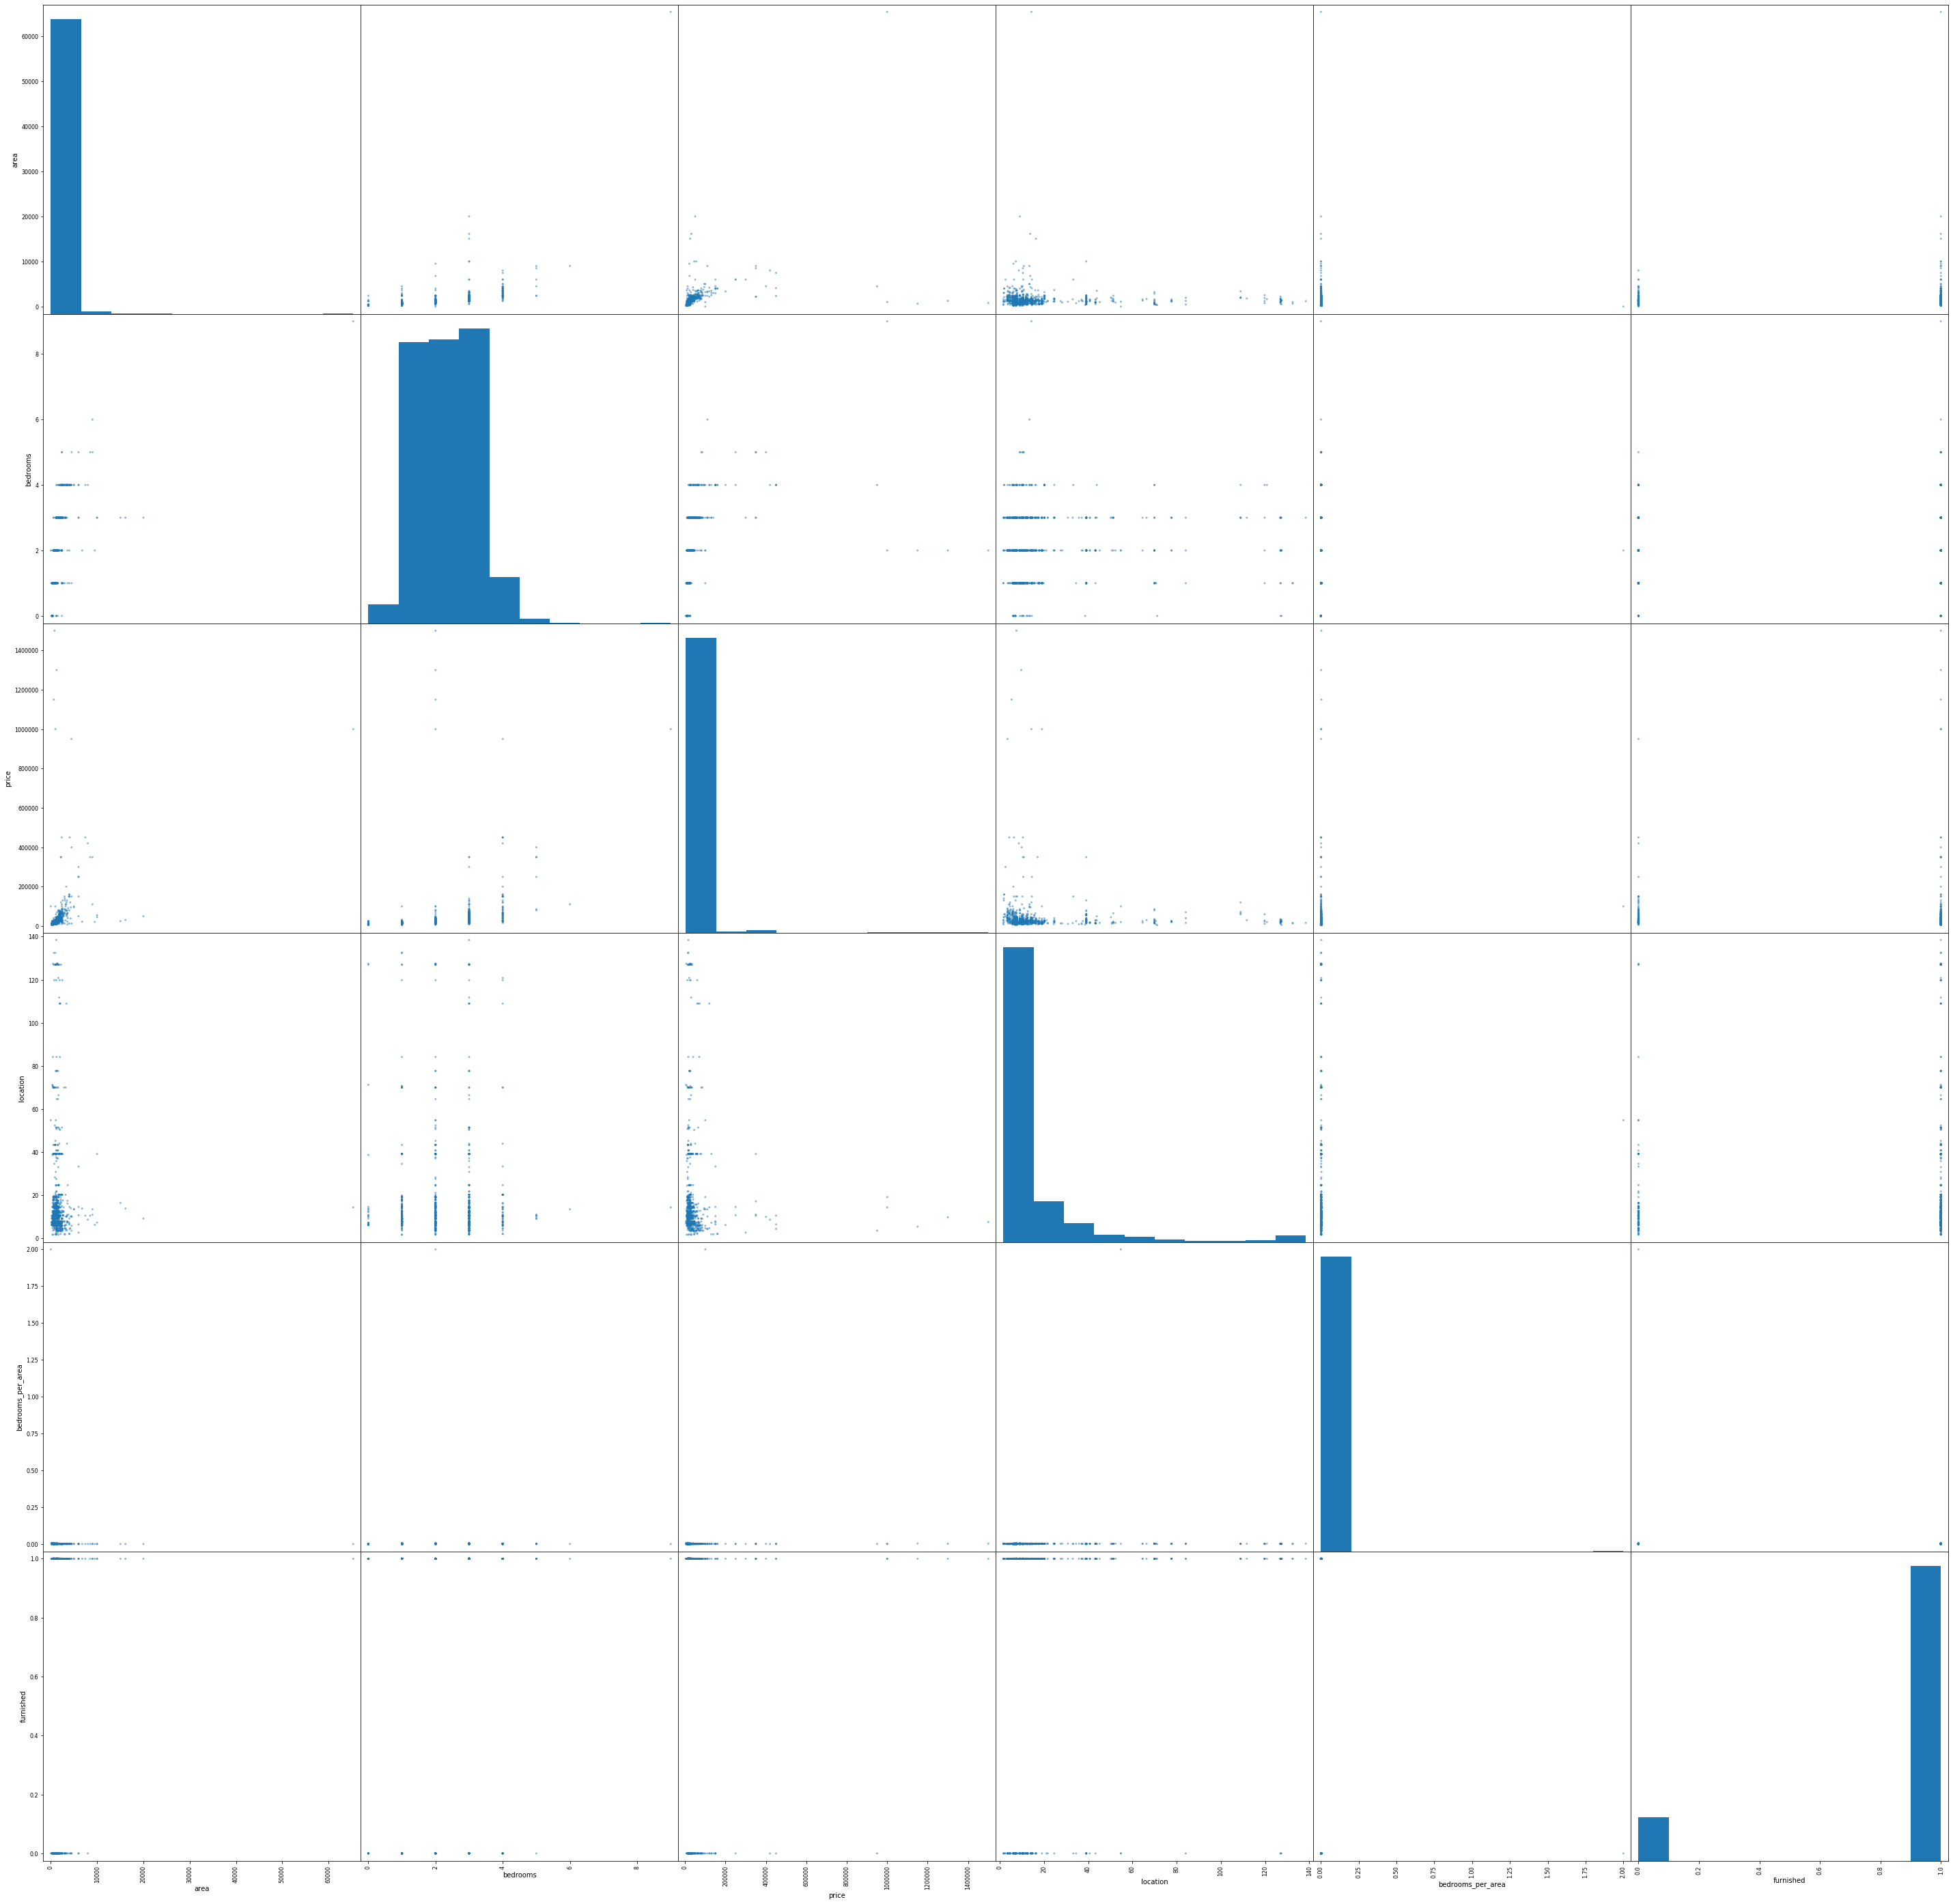

In [65]:
from pandas.plotting import scatter_matrix

cols = ["area", "bedrooms", "price", "location", "bedrooms_per_area", "furnished"
        ]
scatter_matrix(housing_data[cols], figsize=(50, 50))

In [66]:
labels = housing_data['price'].copy()
labels.head()

161     35000
289     13000
217     14000
1389    19000
315     27000
Name: price, dtype: int64

In [67]:
housing_data = housing_data.drop("price", axis=1)
housing_data.head()

area  bedrooms   location  furnished  bedrooms_per_area
161   1410.0         3  16.394655        1.0           0.002128
289    250.0         1   6.170394        1.0           0.004000
217    750.0         1  10.422353        1.0           0.001333
1389   600.0         1   6.170394        1.0           0.001667
315   1500.0         3  43.313063        1.0           0.002000

## Data Transformation


In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

furnished = housing_data[['furnished']].copy()
housing_num = housing_data.drop('furnished' , axis=1)
housing_num_transformed = pipeline.fit_transform(housing_num)

In [69]:
housing_num = pd.DataFrame(housing_num_transformed, columns = housing_num.columns, index=housing_num.index)
housing_num['furnished'] = furnished
housing_num

area  bedrooms  location  bedrooms_per_area  furnished
161  -0.032034  0.909886 -0.015860          -0.020389        1.0
289  -0.551178 -1.103619 -0.491292           0.012295        1.0
217  -0.327409 -1.103619 -0.293575          -0.034255        1.0
1389 -0.394540 -1.103619 -0.491292          -0.028436        1.0
315   0.008244  0.909886  1.235855          -0.022617        1.0
...        ...       ...       ...                ...        ...
790  -0.134968 -0.096867  0.111225          -0.027943        1.0
1026  0.046285  0.909886 -0.225483          -0.024489        1.0
50   -0.371715 -1.103619 -0.352975          -0.030715        1.0
1442 -0.014133  0.909886 -0.293575          -0.021413        1.0
1517  0.088801  0.909886  0.109504          -0.026358        0.0

[1216 rows x 5 columns]